In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource
import copy as cp
from google.colab import files

In [24]:
#parameters 
ep = 0.2
mu = 0.1

# gridscale
dx = 0.4
dt = 0.1

# simulation volume
Nx = 130
L = Nx*dx 

# of timesteps
Nt = 2000

# store the solution every
P = 250

In [3]:
def IC(x):
  return 1/2*( 1 - np.tanh((x-25)/5) )

def BC(u):
  u[:, 0] = 1
  u[:, -1] = 0
  return u

In [4]:
def IC2(x):
  return 0.8 * ( 1 - (np.tanh(3 * x/12 - 3))**2) + 0.3 * ( 1 - (np.tanh(4.5 * x/26 - 4.5))**2) 

In [30]:
t = np.arange(0, Nt+1) # of sweeps
t_P = np.arange(0, Nt+1, P)

In [31]:
x = np.linspace(0, L, Nx + 1) # 131

In [7]:
u = np.zeros((Nt + 1, Nx + 1)) # Nx +1 
# Nt +1 because Lira wants it

In [8]:
u[0] = IC(x)
u = BC(u)

In [9]:
def KdeV(U_old):
  U = cp.deepcopy(U_old)
    
  timerows = int(Nt/P) + 1
  U_P = np.zeros((timerows, Nx + 1))
  
  timerow = 0

  # for n in range(Nt-1):
  #   for j in range(1, Nx-1):    
  #     U[n+1, j] = U[n-1, j] + ep/3*dt/dx*(U[n, j+1] + U[n, j] + U[n, j-1])*(U[n, j+1]-U[n, j-1]) - mu*dt/dx**3*(U[n, j+2] + 2*U[n, j-1] - 2*U[n, j+1] - U[n, j-2])
   

  for n in range(Nt):
    if n%P ==0:
      U_P[timerow, :] = U[n, :]
      timerow = timerow + 1 
    for j in range(1, Nx):
      if n + 1 == 1:
        if j == 1:
          U[1, j] = U[0, j] + ep/6*dt/dx*(U[0, j+1] + U[0, j] + U[0, j-1])*(U[0, j+1]-U[0, j-1]) - mu/2*dt/dx**3*(U[0, j+2] + 2*U[0, j-1] - 2*U[0, j+1] - U[0, j-1]) 
        elif j == Nx - 1:
          U[1, j] = U[0, j] + ep/6*dt/dx*(U[0, j+1] + U[0, j] + U[0, j-1])*(U[0, j+1]-U[0, j-1]) - mu/2*dt/dx**3*(U[0, j+1] + 2*U[0, j-1] - 2*U[0, j+1] - U[0, j-2])
        else: 
          U[1, j] = U[0, j] + ep/6*dt/dx*(U[0, j+1] + U[0, j] + U[0, j-1])*(U[0, j+1]-U[0, j-1]) - mu/2*dt/dx**3*(U[0, j+2] + 2*U[0, j-1] - 2*U[0, j+1] - U[0, j-2]) 
      else:
        if j == 1:
          U[n+1, j] = U[n-1, j] + ep/3*dt/dx*(U[n, j+1] + U[n, j] + U[n, j-1])*(U[n, j+1]-U[n, j-1]) - mu*dt/dx**3*(U[n, j+2] + 2*U[n, j-1] - 2*U[n, j+1] - U[n, j-1])
        elif j == Nx - 1:
          U[n+1, j] = U[n-1, j] + ep/3*dt/dx*(U[n, j+1] + U[n, j] + U[n, j-1])*(U[n, j+1]-U[n, j-1]) - mu*dt/dx**3*(U[n, j+1] + 2*U[n, j-1] - 2*U[n, j+1] - U[n, j-2])
        else:
          U[n+1, j] = U[n-1, j] + ep/3*dt/dx*(U[n, j+1] + U[n, j] + U[n, j-1])*(U[n, j+1]-U[n, j-1]) - mu*dt/dx**3*(U[n, j+2] + 2*U[n, j-1] - 2*U[n, j+1] - U[n, j-2])   

  return U, U_P

In [10]:
U_test, U_P_test = KdeV(u)

In [32]:
X, T = np.meshgrid(x, t)
X_P, T_P = np.meshgrid(x, t_P)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

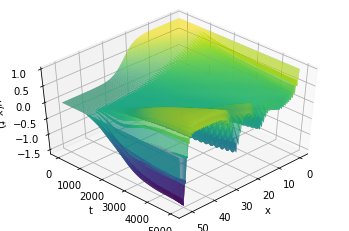

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, U_test, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel(r'$u(x, t)$')
ax.view_init(45, 45)
plt.savefig("3b_3.png")
files.download("3b_3.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

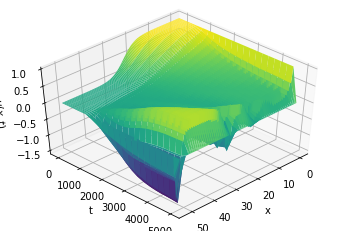

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_P, T_P, U_P_test, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel(r'$u(x, t)$')
ax.view_init(45, 45)
plt.savefig("2b_1.png")
files.download("2b_1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

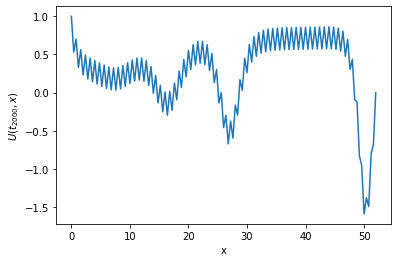

In [14]:
plt.plot(x, U_test[-1, :])
plt.xlabel('x')
plt.ylabel(r'$U(t_{2000}, x)$')
plt.savefig("3b_4.png")
files.download("3b_4.png")
plt.show()


In [25]:
u2 = np.zeros((Nt + 1, Nx + 1))
u2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
u2[0, :] = IC2(x)
u2 = BC(u2)

In [27]:
u2[0, 30]

0.8092837664819631

In [28]:
U2_test, U2_P_test = KdeV(u2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

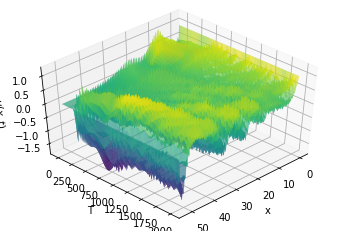

In [33]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,T, U2_test, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('T')
ax.set_zlabel(r'$u(x, t)$')
ax.view_init(45, 45)
plt.savefig("2a.png")
files.download("2a.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

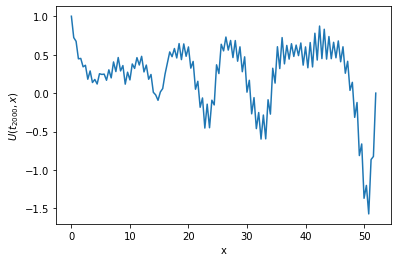

In [34]:
plt.plot(x, U2_test[-1, :])
plt.xlabel('x')
plt.ylabel(r'$U(t_{2000}, x)$')
plt.savefig("3b_4.png")
files.download("3b_4.png")
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

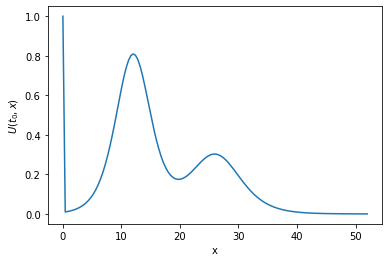

In [35]:
plt.plot(x, U2_test[0, :])

plt.xlabel('x')
plt.ylabel(r'$U(t_{0}, x)$')
plt.savefig("3b_4.png")
files.download("3b_4.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

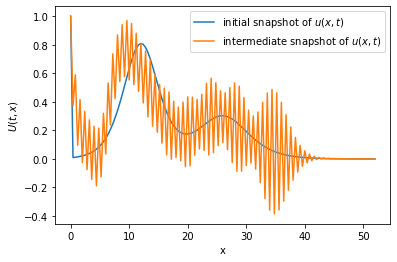

In [47]:
plt.plot(x, U2_test[0, :], label = r'initial snapshot of $u(x, t)$')
plt.plot(x, U2_test[150, :], label = r'intermediate snapshot of $u(x, t)$')
plt.xlabel('x')
plt.ylabel(r'$U(t, x)$')
plt.legend()
plt.savefig("3b_5.png")
files.download("3b_5.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

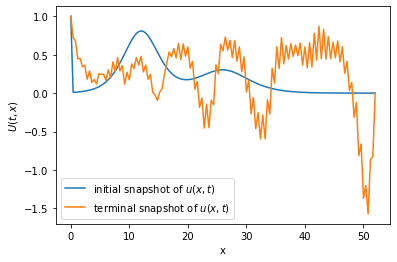

In [38]:
plt.plot(x, U2_test[0, :], label = r'initial snapshot of $u(x, t)$')
plt.plot(x, U2_test[-1, :], label = r'terminal snapshot of $u(x, t)$')
plt.xlabel('x')
plt.ylabel(r'$U(t, x)$')
plt.legend()
plt.savefig("3b_5.png")
files.download("3b_5.png")
plt.show()

In [20]:
U2_test

array([[ 1.00000000e+00,  9.79981356e-03,  1.19414111e-02, ...,
         1.95288906e-04,  1.70044059e-04,  0.00000000e+00],
       [ 1.00000000e+00, -7.60087110e-02,  8.94255247e-02, ...,
         2.06937178e-04,  1.57051469e-04,  0.00000000e+00],
       [ 1.00000000e+00, -1.36155312e-01,  1.93762154e-01, ...,
         2.14512764e-04,  1.40433239e-04,  0.00000000e+00],
       ...,
       [ 1.00000000e+00,             nan,             nan, ...,
                    nan,             nan,  0.00000000e+00],
       [ 1.00000000e+00,             nan,             nan, ...,
                    nan,             nan,  0.00000000e+00],
       [ 1.00000000e+00,             nan,             nan, ...,
                    nan,             nan,  0.00000000e+00]])

<ipython-input-21-d83d3a3aed6a>:3: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X_P,T_P, U2_P_test, rstride=1, cstride=1,


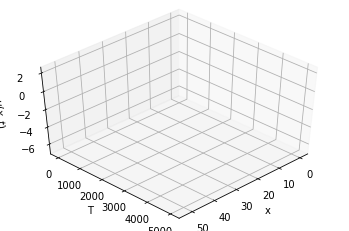

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_P,T_P, U2_P_test, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('T')
ax.set_zlabel(r'$u(x, t)$')
ax.view_init(45, 45)


In [22]:
np.all(dt/dx * (ep * np.abs(U_test) + 4 * mu/dx**2) <= 1)==True

True

In [23]:
fig = plt.figure()
Z = np.ones(np.shape(U_test))
ax = plt.axes(projection='3d')
ax.plot_surface(X,T, dt/dx * (ep * np.abs(U_test) + 4 * mu/dx**2), rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.plot_surface(X,T, Z, rstride=1, cstride=1,
                 edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('T')
ax.set_zlabel(r'Stability condition')
ax.view_init(45, 45)
plt.savefig("2b_2.png")
files.download("2b_2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Error in callback <function flush_figures at 0x7f827982dd30> (for post_execute):


KeyboardInterrupt: ignored